In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregar dados
df = pd.read_csv('../dados/seeds_tratado.csv')

X = df.drop('Class', axis=1)
y = df['Class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Melhores parâmetros KNN: {'n_neighbors': 3}
Acurácia: 0.8888888888888888
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.83      0.90      0.86        21
        Kama       0.85      0.81      0.83        21
        Rosa       1.00      0.95      0.98        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



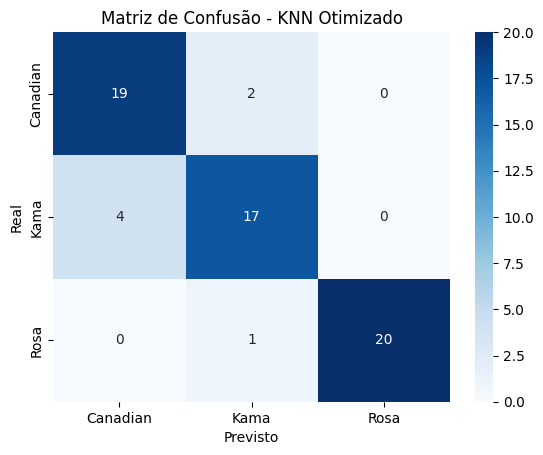

In [4]:
# GridSearch para KNN
param_knn = {'n_neighbors': list(range(1, 21))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Melhores parâmetros KNN:", grid_knn.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusão - KNN Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Melhores parâmetros SVM: {'C': 1, 'kernel': 'linear'}
Acurácia: 0.8888888888888888
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



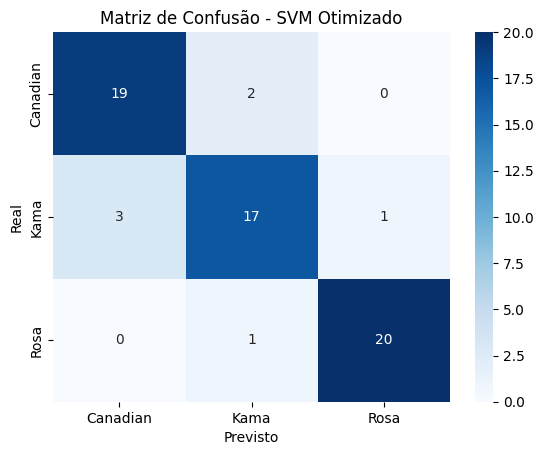

In [5]:
# GridSearch para SVM
param_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_svm = GridSearchCV(SVC(), param_svm, cv=5)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("Melhores parâmetros SVM:", grid_svm.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusão - SVM Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Melhores parâmetros Random Forest: {'max_depth': 5, 'n_estimators': 50}
Acurácia: 0.8412698412698413
Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.78      0.86      0.82        21
        Kama       0.79      0.71      0.75        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



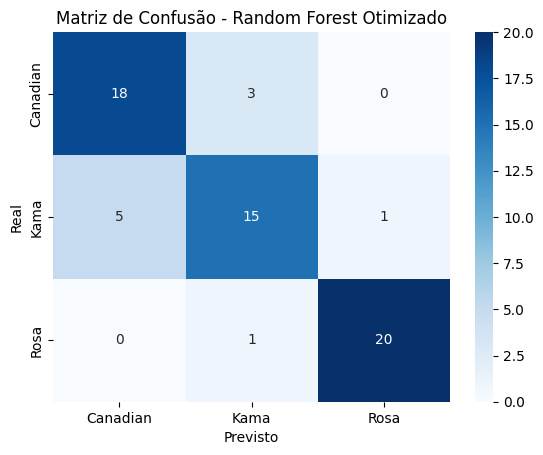

In [6]:
# GridSearch para Random Forest
param_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Melhores parâmetros Random Forest:", grid_rf.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusão - Random Forest Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()